# 0. Import and initial look at df

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import fiona
! python --version

Python 3.8.19


In [4]:
#importing df (world_mining_commodities_clean.csv)

df = pd.read_csv(r'C:\Users\Marty\Documents\Datasets\Mined_raw_materials\clean_data_files\Git\world_mining_commodities_clean.csv')

In [5]:
#inspecting head

df.head(3)

,country,mined_raw_mat,unit,2018,2019,2020,2021,2022
0,Afghanistan,Chromium,(t),2000.0,2000.0,2000.0,5300.0,19100.0
1,Afghanistan,Fluorspar,(t),10000.0,50000.0,10000.0,10000.0,27600.0
2,Afghanistan,Gypsum,(t),36161.0,24682.0,21779.0,16349.0,10991.0


In [6]:
#df.columns

In [7]:
# shape df

df.shape

(1982, 8)

In [8]:
# df info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1982 non-null   object 
 1   mined_raw_mat  1982 non-null   object 
 2   unit           1982 non-null   object 
 3   2018           1969 non-null   float64
 4   2019           1973 non-null   float64
 5   2020           1980 non-null   float64
 6   2021           1982 non-null   float64
 7   2022           1982 non-null   float64
dtypes: float64(5), object(3)
memory usage: 124.0+ KB


In [9]:
# we want to see unique country names and total number of countries 

print(df["country"].unique())
print(df["country"].nunique())

# we want to see unique commodity names and total number of commodities 

print(df["mined_raw_mat"].unique())
print(df["mined_raw_mat"].nunique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia-Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Congo, D.R.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Korea, North' 'Korea, South' 'Kosovo' 'Kuwait' 'Kyrgyzstan'
 'Laos' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'L

In [10]:
# we want to see unique measurement units and total number of units 

print(df["unit"].unique())
print(df["unit"].nunique())

['(t)' '(Mio m3)' '(kg)' '(ct)']
4


In [11]:
# we want see a list of those commodities with unit kg

# filter the df for rows where 'unit' is '(kg)'
filtered_df = df[df["unit"] == '(kg)']

# extract unique values from the 'mined_raw_mat' column
unique_materials_kg = filtered_df["mined_raw_mat"].unique()

print(unique_materials_kg)

['Gold' 'Silver' 'Rhenium' 'Palladium' 'Platinum' 'Rhodium']


In [12]:
# we want see a list of those commodities with unit mio m3

# filter the df for rows where 'unit' is '(mio m3)'
filtered_m3_df = df[df["unit"] == "(Mio m3)"]

# xxtract unique values from the 'mined_raw_mat' column
unique_materials_m3 = filtered_m3_df["mined_raw_mat"].unique()

print(unique_materials_m3)

['Nat. Gas']


In [13]:
# we want see a list of those commodities with unit ct

# filter the df for rows where 'unit' is '(ct)'
filtered_ct_df = df[df["unit"] == "(ct)"]

# xxtract unique values from the 'mined_raw_mat' column
unique_materials_ct = filtered_ct_df["mined_raw_mat"].unique()

print(unique_materials_ct)

['Diam. (Gem)' 'Diam. (Ind)']


In [ ]:
# now we know that the majority of the commodities are quoted in (t)

# 1. Top 5 producers in terms of countries where commodities are mined

In [15]:
# what is the most produced commodity in terms of countries where it's mined?

df["mined_raw_mat"].value_counts()

mined_raw_mat
Gold          104
Petroleum     104
Salt          102
Nat. Gas       96
Gypsum         80
             ... 
Oil Shales      6
Rhodium         6
Gallium         6
Germanium       6
Oil Sands*      2
Name: count, Length: 65, dtype: int64

In [16]:
# we want to see top 5 produceres (contries) of gold for each year

# filtering the df for "Gold"
gold_df = df[df["mined_raw_mat"] == "Gold"]

# melting the df to have years as rows
melted_gold_df = gold_df.melt(
    id_vars=["country", "mined_raw_mat", "unit"],
    var_name="year",
    value_name="production")

# we convert 'year' to integer
melted_gold_df["year"] = melted_gold_df["year"].astype(int)

# sorting by year and production within each year
top_5_gold = (
    melted_gold_df.groupby("year")
    .apply(lambda x: x.nlargest(5, "production"))
    .reset_index(drop=True))

print(top_5_gold)

# the table can be a bit "hard" to read thus we'll visualize the data

          country mined_raw_mat  unit  year  production
0           China          Gold  (kg)  2018    401119.0
1       Australia          Gold  (kg)  2018    309700.0
2          Russia          Gold  (kg)  2018    279850.0
3    Russia, Asia          Gold  (kg)  2018    274450.0
4   United States          Gold  (kg)  2018    225528.0
5           China          Gold  (kg)  2019    380230.0
6       Australia          Gold  (kg)  2019    325572.0
7          Russia          Gold  (kg)  2019    305050.0
8    Russia, Asia          Gold  (kg)  2019    300750.0
9   United States          Gold  (kg)  2019    201000.0
10          China          Gold  (kg)  2020    365340.0
11      Australia          Gold  (kg)  2020    327952.0
12         Russia          Gold  (kg)  2020    308560.0
13   Russia, Asia          Gold  (kg)  2020    301660.0
14  United States          Gold  (kg)  2020    193400.0
15          China          Gold  (kg)  2021    328980.0
16         Russia          Gold  (kg)  2021    3

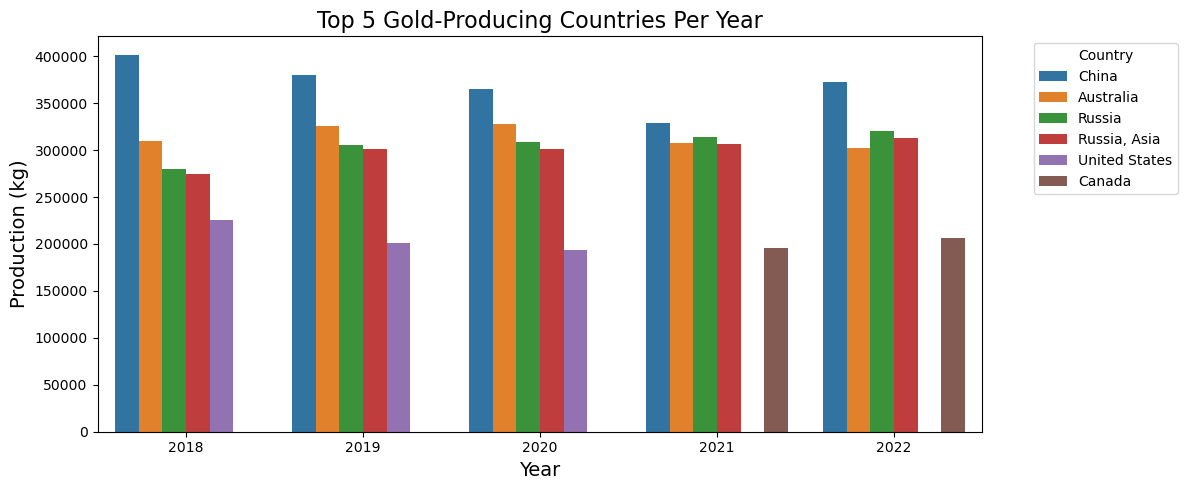

In [17]:
#plotting the top_5_gold
plt.figure(figsize=(12, 5))
sns.barplot(
    data=top_5_gold, 
    x="year", 
    y="production", 
    hue="country", 
    dodge=True)

#adding labels and title
plt.title("Top 5 Gold-Producing Countries Per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Production (kg)", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Slightly decreasing trend during the period
# China is the leading mining country during the period 
# we observe that Canada replaces USA in 2021 and 2022

In [18]:
# we can modify the code if we want to see another commoidty, let's says copper. we just need to replace Gold with Copper 

# filtering the df for "Copper"
copper_df = df[df["mined_raw_mat"] == "Copper"]

# melting the df to have years as rows
melted_copper_df = copper_df.melt(
    id_vars=["country", "mined_raw_mat", "unit"],
    var_name="year",
    value_name="production")

# we convert 'year' to integer
melted_copper_df["year"] = melted_copper_df["year"].astype(int)

# sorting by year and production within each year
top_5_copper = (
    melted_copper_df.groupby("year")
    .apply(lambda x: x.nlargest(5, "production"))
    .reset_index(drop=True))

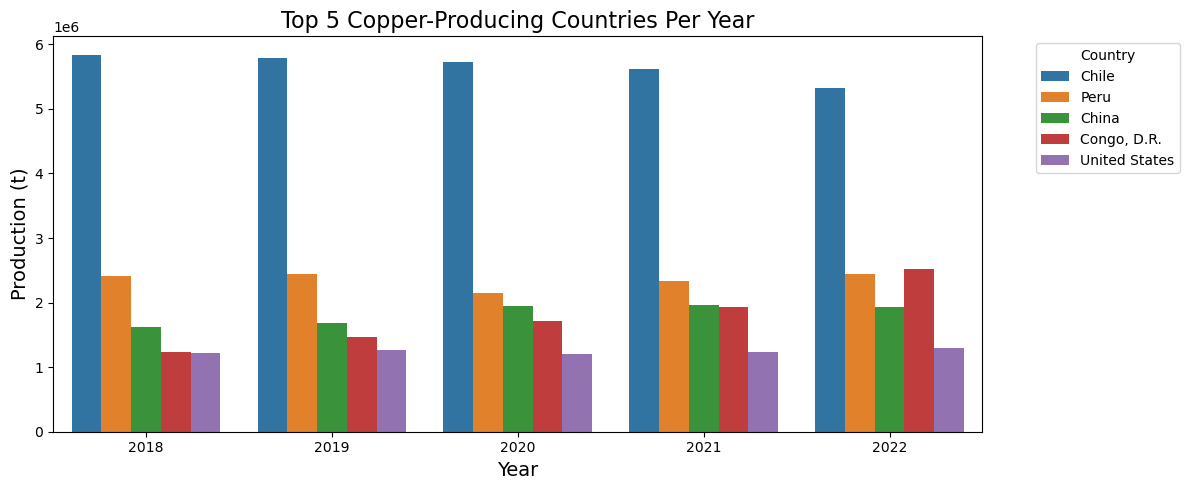

In [19]:
#plotting the top_5_copper
plt.figure(figsize=(12, 5))
sns.barplot(
    data=top_5_copper, 
    x="year", 
    y="production", 
    hue="country", 
    dodge=True)

#adding labels and title
plt.title("Top 5 Copper-Producing Countries Per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Production (t)", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# we observe that Chile is a clear top one mining country during the period

# 2. adding the commodity_info file to our df

In [20]:
# now let's appended the file: commodity_info to enrich our df 

df_info = pd.read_excel(r'C:\Users\Marty\Documents\Datasets\Mined_raw_materials\clean_data_files\Git\commodity_info.xlsx')

In [97]:
# quick look at the head

df_info.head(3)

,commodity,chemical_composition,atomic_no,periodic_table_group,periodic_table_period,periodic_table_block,material_sub,form
0,Chromium,Cr,24,6.0,4.0,d_block,transition_metal,solid
1,Fluorspar,CaF2,NaN,NaN,NaN,NaN,mineral,solid
2,Gypsum,CaSO4·2H2O,NaN,NaN,NaN,NaN,mineral,solid


In [22]:
# we'll merge the first df with df_info (i.e. adding those additonal columns). we can merge on the mined_raw_mat and commodity column as each underlying is unique

merged_df = df.merge(df_info, left_on="mined_raw_mat", right_on="commodity", how="left")

# and name it df again

df = merged_df

In [23]:
# let's look at our updated df

df

# we see that some mined underlyings are elements i.e. they have an atomic number. for those we also see addtional info related to the periodic table.
# the remaining commodities are categorised as "mineral" (see material_sub)

,country,mined_raw_mat,unit,2018,2019,2020,2021,2022,commodity,chemical_composition,atomic_no,periodic_table_group,periodic_table_period,periodic_table_block,material_sub,form
0,Afghanistan,Chromium,(t),2000.0,2000.0,2000.0,5300.0,19100.0,Chromium,Cr,24,6.0,4.0,d_block,transition_metal,solid
1,Afghanistan,Fluorspar,(t),10000.0,50000.0,10000.0,10000.0,27600.0,Fluorspar,CaF2,NaN,NaN,NaN,NaN,mineral,solid
2,Afghanistan,Gypsum,(t),36161.0,24682.0,21779.0,16349.0,10991.0,Gypsum,CaSO4·2H2O,NaN,NaN,NaN,NaN,mineral,solid
3,Afghanistan,Salt,(t),47944.0,41157.0,12015.0,10700.0,41573.0,Salt,NaCl,NaN,NaN,NaN,NaN,mineral,solid
4,Afghanistan,Talc,(t),356789.0,345052.0,95923.0,441372.0,382211.0,Talc,Mg3Si4O10(OH)2,NaN,NaN,NaN,NaN,mineral,solid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,Zimbabwe,Diam. (Ind),(ct),2276690.0,1695350.0,2136370.0,3379440.0,3875220.0,Diam. (Ind),C,NaN,NaN,NaN,NaN,mineral,solid
1978,Zimbabwe,Phosphates,(t),15400.0,8100.0,13500.0,11900.0,6600.0,Phosphates,PO34,NaN,NaN,NaN,NaN,mineral,solid
1979,Zimbabwe,Vermiculite,(t),33161.0,25524.0,26388.0,27713.0,26380.0,Vermiculite,"(Mg,Ca,K,Fe+2)3 (Si,Al,Fe+3) 4O10(OH)2C4H2O",NaN,NaN,NaN,NaN,mineral,solid
1980,Zimbabwe,Steam Coal,(t),3049730.0,2428370.0,2328030.0,1716120.0,2212880.0,Steam Coal,C8H6O,NaN,NaN,NaN,NaN,mineral,solid


In [24]:
# what material_sub is the most common?

df.value_counts("material_sub")

material_sub
mineral             789
transition_metal    634
other_metal         209
not_metal            93
alka_metal           24
Name: count, dtype: int64

In [25]:
# let's inspect the other categories

df[df["material_sub"] == "mineral"]["commodity"].unique()

array(['Fluorspar', 'Gypsum', 'Salt', 'Talc', 'Steam Coal', 'Bentonite',
       'Diatomite', 'Feldspar', 'Kaolin', 'Phosphates', 'Diam. (Gem)',
       'Diam. (Ind)', 'Perlite', 'Antimony', 'Bauxite', 'Magnesite',
       'Potash', 'Zircon', 'Coking Coal', 'Lignite', 'Oil Shales',
       'Asbestos', 'Vermiculite', 'Oil Sands*'], dtype=object)

In [26]:
# let's inspect the other categories

df[df["material_sub"] == "transition_metal"]["commodity"].unique()

array(['Chromium', 'Nickel', 'Copper', 'Iron', 'Zinc', 'Gold', 'Silver',
       'Manganese', 'Molybdenum', 'Cadmium', 'Mercury', 'Rhenium',
       'Cobalt', 'Tantalum', 'Titanium', 'Tungsten', 'Palladium',
       'Platinum', 'Niobium', 'Vanadium', 'Rhodium'], dtype=object)

In [27]:
# let's inspect the other categories

df[df["material_sub"] == "other_metal"]["commodity"].unique()

array(['Aluminium', 'Lead', 'Boron', 'Rare Earths', 'Tin', 'Uranium',
       'Arsenic', 'Indium', 'Bismuth', 'Tellurium', 'Gallium',
       'Germanium'], dtype=object)

In [28]:
# let's inspect the other categories

df[df["material_sub"] == "not_metal"]["commodity"].unique()

array(['Sulfur', 'Graphite', 'Selenium'], dtype=object)

In [29]:
# let's inspect the other categories

df[df["material_sub"] == "alka_metal"]["commodity"].unique()

array(['Lithium', 'Beryllium'], dtype=object)

# 3. lets assume we wanted to have a close look at Lithium

In [31]:
# lets say we wanted to have a close look at Lithium as we're looking for investment oppportunities in companies mining Lithium

df_lithium_prod = df.loc[df["commodity"] == "Lithium"]

df_lithium_prod

,country,mined_raw_mat,unit,2018,2019,2020,2021,2022,commodity,chemical_composition,atomic_no,periodic_table_group,periodic_table_period,periodic_table_block,material_sub,form
45,Argentina,Lithium,(t),13810.0,13670.0,12620.0,12870.0,14210.0,Lithium,Li,3,1.0,2.0,s_block,alka_metal,solid
87,Australia,Lithium,(t),115200.0,105700.0,89300.0,113600.0,149800.0,Lithium,Li,3,1.0,2.0,s_block,alka_metal,solid
172,Bolivia,Lithium,(t),10.0,160.0,80.0,410.0,250.0,Lithium,Li,3,1.0,2.0,s_block,alka_metal,solid
219,Brazil,Lithium,(t),786.0,2575.0,4065.0,5670.0,7863.0,Lithium,Li,3,1.0,2.0,s_block,alka_metal,solid
297,Canada,Lithium,(t),8750.0,1200.0,0.0,0.0,0.0,Lithium,Li,3,1.0,2.0,s_block,alka_metal,solid
332,Chile,Lithium,(t),38850.0,44940.0,49730.0,65060.0,110350.0,Lithium,Li,3,1.0,2.0,s_block,alka_metal,solid
375,China,Lithium,(t),15300.0,19000.0,28800.0,30500.0,57900.0,Lithium,Li,3,1.0,2.0,s_block,alka_metal,solid
1127,Namibia,Lithium,(t),600.0,0.0,0.0,0.0,0.0,Lithium,Li,3,1.0,2.0,s_block,alka_metal,solid
1178,Nigeria,Lithium,(t),50.0,10.0,0.0,20.0,20.0,Lithium,Li,3,1.0,2.0,s_block,alka_metal,solid
1337,Portugal,Lithium,(t),914.0,710.0,280.0,225.0,210.0,Lithium,Li,3,1.0,2.0,s_block,alka_metal,solid


In [32]:
df_lithium_prod.loc[:, "total"] = df_lithium_prod["2018"] + df_lithium_prod["2019"] + df_lithium_prod["2020"] + df_lithium_prod["2021"] + df_lithium_prod["2022"]

#or use below if warning shows 

#df_lithium_prod = df_lithium_prod.assign(total=df_lithium_prod["2018"] + df_lithium_prod["2019"] + df_lithium_prod["2020"] 
#                                                                      + df_lithium_prod["2021"] + df_lithium_prod["2022"])

C:\Users\Marty\AppData\Local\Temp\ipykernel_18532\4143407717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lithium_prod.loc[:, "total"] = df_lithium_prod["2018"] + df_lithium_prod["2019"] + df_lithium_prod["2020"] + df_lithium_prod["2021"] + df_lithium_prod["2022"]


In [33]:
df_lithium_prod = df_lithium_prod.drop(columns=["2018", "2019", "2020", "2021", "2022"])

In [34]:
df_lithium_prod = df_lithium_prod[["country", "mined_raw_mat","total"]]

In [35]:
df_lithium_prod

,country,mined_raw_mat,total
45,Argentina,Lithium,67180.0
87,Australia,Lithium,573600.0
172,Bolivia,Lithium,910.0
219,Brazil,Lithium,20959.0
297,Canada,Lithium,9950.0
332,Chile,Lithium,308930.0
375,China,Lithium,151500.0
1127,Namibia,Lithium,600.0
1178,Nigeria,Lithium,100.0
1337,Portugal,Lithium,2339.0


In [36]:
df_lithium_prod.sort_values(by="total", ascending=False)

,country,mined_raw_mat,total
87,Australia,Lithium,573600.0
332,Chile,Lithium,308930.0
375,China,Lithium,151500.0
45,Argentina,Lithium,67180.0
219,Brazil,Lithium,20959.0
1970,Zimbabwe,Lithium,11880.0
297,Canada,Lithium,9950.0
1854,United States,Lithium,8315.0
1337,Portugal,Lithium,2339.0
172,Bolivia,Lithium,910.0


C:\Users\Marty\AppData\Local\Temp\ipykernel_18532\274866367.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


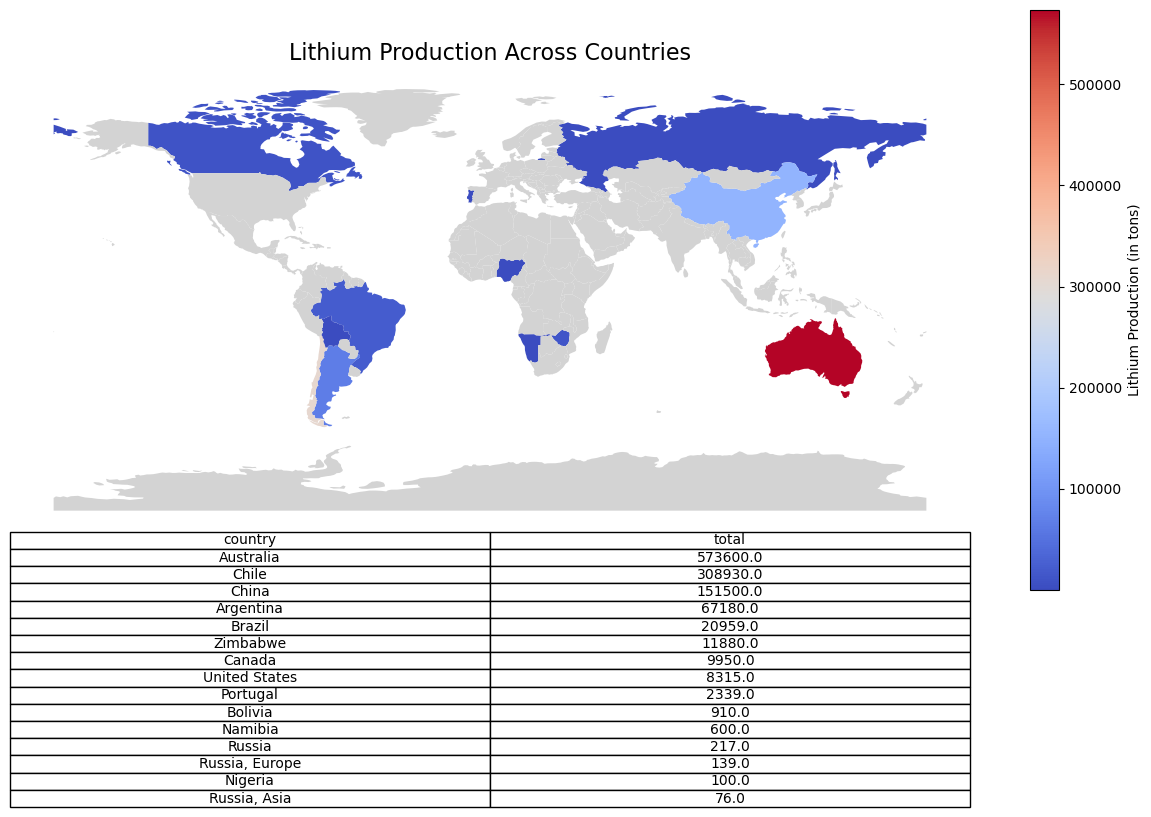

In [37]:
pd.DataFrame(df_lithium_prod)

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world shapefile with your lithium data
merged = world.set_index('name').join(df_lithium_prod.set_index('country'))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='total', ax=ax, legend=True,
            legend_kwds={'label': "Lithium Production (in tons)",
                         'orientation': "vertical"},
            cmap='coolwarm', missing_kwds={'color': 'lightgrey'})

plt.title("Lithium Production Across Countries", fontsize=16)


# adding table

table_data = df_lithium_prod[['country', 'total']].sort_values(by="total", ascending=False)  # Adjust columns as needed

# Create the table and set its position
plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='center', colLoc='center')

ax.axis('off')


# Adjust the layout to make space for the table
plt.subplots_adjust(left=0.1, bottom=0.3)

plt.show()

In [38]:
df_lithium_prod.sort_values(by="total", ascending=False, inplace=True)
df_lithium_prod.reset_index(drop=True, inplace=True)

In [39]:
df_lithium_prod

,country,mined_raw_mat,total
0,Australia,Lithium,573600.0
1,Chile,Lithium,308930.0
2,China,Lithium,151500.0
3,Argentina,Lithium,67180.0
4,Brazil,Lithium,20959.0
5,Zimbabwe,Lithium,11880.0
6,Canada,Lithium,9950.0
7,United States,Lithium,8315.0
8,Portugal,Lithium,2339.0
9,Bolivia,Lithium,910.0


# 4 lets say we're looking for investment oppportunities in companies mining Lithium

In [41]:
# we'll import the file call 116_world_mining_companies_clean 
# of course we could google as well but now that we have a list it might bring us some additonal insight, especially if we're looking at less well described/known commoditoes

df_companies = pd.read_csv(r'C:\Users\Marty\Documents\Datasets\Mined_raw_materials\clean_data_files\Git\116_world_mining_companies_clean.csv')

In [42]:
# have a look at it

df_companies

,Name,Ticker / Market Capitalization,Project Stage,Commodity,Location,Website
0,Abcourt Mines Inc,TSXV: ABI - $26M (CAD),"Development, Exploration, Production",Gold,Canada,https://abcourt.info/
1,Aben Minerals Ltd.,TSXV: ABM,Exploration,Gold,Canada,https://abenminerals.com/
2,Aftermath Silver,TSXV: AAG,Exploration,Silver,"Chile, Peru",https://aftermathsilver.com/
3,Amex Exploration,TSXV: AMX - $171M (CAD),Exploration,Gold,"Quebec, Canada",https://www.amexexploration.com/
4,Anglo American,LSE: AAL - $289M (GBP),"Production, Exploration, Development","Diamond, Nickel, Copper, Platinum",NaN,https://www.angloamerican.com/
...,...,...,...,...,...,...
111,Vale,NYSE: VALE,Exploration,"Iron Ore, Nickel, Cobalt, Platinum","Canada, United Kingdom, Brazil, Japan, Indonesia",https://vale.com/
112,Vision Lithium,TSXV: VLI - $7M (CAD),Exploration,"Lithium, Zinc","Quebec, Manitoba, Canada",https://visionlithium.com/
113,Viva Gold Corp,TSXV: VAU - $19M (CAD),Exploration,Gold,"Nevada, USA",https://vivagoldcorp.com/
114,Western Mines Group,ASX: WMG - $22M (AUD),Exploration,Nickel,Australia,https://www.westernmines.com.au/


In [43]:
# we now want a df with those companis that has Lithium operations thus...
# we use isin as the df_companies["Commodity"] column contains objetcs/string of text (and not always just one word/single string)

li_companies = df_companies[df_companies["Commodity"].notna() & df_companies["Commodity"].str.contains("Lithium")]
li_companies

,Name,Ticker / Market Capitalization,Project Stage,Commodity,Location,Website
25,Cornish Lithium,Private,Exploration,Lithium,"Cornwall, UK",https://cornishlithium.com/
27,Cornish Tin,Private,NaN,"Lithium, Tin, Copper, Tungsten","Cornwall, UK",https://www.cornishtin.uk/
31,E3 Lithium,"OTC: EEMMF, TSXV: ETL",Exploration,Lithium,Canada,https://e3lithium.ca/
45,GALAN LITHIUM LIMITED,ASX: GLN - $78M (AUD),"Exploration, Development",Lithium,"Argentina, Australia",https://galanlithium.com.au/
48,Green Lithium,NaN,Production,Lithium,NaN,https://greenlithium.co.uk/
50,Grid Metals,TSXV: GRDM - $10M (CAD),"Exploration, Development","Copper, Nickel, Lithium","Manitoba and Ontario, Canada",https://gridmetalscorp.com/
53,Imagine Lithium,TSXV: ILI - $15M (CAD),Exploration,Lithium,"Quebec, Canada",https://imaginelithium.com/
54,IMERYS British Lithium,Private,Exploration,Lithium,"Cornwall, UK",https://imerysbritishlithium.com/
61,Kuniko Limited,ASX: KNI - $19M (AUD),Exploration,"Copper, Nickel, Cobalt, Lithium","Sweden, Norway",https://kuniko.eu/
78,Peloton Minerals Corporation,CSE: PMC - $12M (CAD),Exploration,Lithium,USA,https://pelotonminerals.com/


In [44]:
li_companies_copy = li_companies.copy()
li_companies_copy.sort_values(by="Name", ascending=True, inplace=True)

In [45]:
li_companies = li_companies_copy

In [46]:
li_companies.reset_index(drop=True, inplace=True)

In [47]:
# we have now have investment candidate list that we can investigate further i.e. we need to analyse each company etc. but that not includede in the scope of this dataset

li_companies

,Name,Ticker / Market Capitalization,Project Stage,Commodity,Location,Website
0,Cornish Lithium,Private,Exploration,Lithium,"Cornwall, UK",https://cornishlithium.com/
1,Cornish Tin,Private,NaN,"Lithium, Tin, Copper, Tungsten","Cornwall, UK",https://www.cornishtin.uk/
2,E3 Lithium,"OTC: EEMMF, TSXV: ETL",Exploration,Lithium,Canada,https://e3lithium.ca/
3,GALAN LITHIUM LIMITED,ASX: GLN - $78M (AUD),"Exploration, Development",Lithium,"Argentina, Australia",https://galanlithium.com.au/
4,Green Lithium,NaN,Production,Lithium,NaN,https://greenlithium.co.uk/
5,Grid Metals,TSXV: GRDM - $10M (CAD),"Exploration, Development","Copper, Nickel, Lithium","Manitoba and Ontario, Canada",https://gridmetalscorp.com/
6,IMERYS British Lithium,Private,Exploration,Lithium,"Cornwall, UK",https://imerysbritishlithium.com/
7,Imagine Lithium,TSXV: ILI - $15M (CAD),Exploration,Lithium,"Quebec, Canada",https://imaginelithium.com/
8,Kuniko Limited,ASX: KNI - $19M (AUD),Exploration,"Copper, Nickel, Cobalt, Lithium","Sweden, Norway",https://kuniko.eu/
9,Peloton Minerals Corporation,CSE: PMC - $12M (CAD),Exploration,Lithium,USA,https://pelotonminerals.com/


In [ ]:
# repeat the proces for any underlying commodity and you might get valuable insgihts - have fun